In [48]:
for i in range(5):
    print(i)

0
1
2
3
4


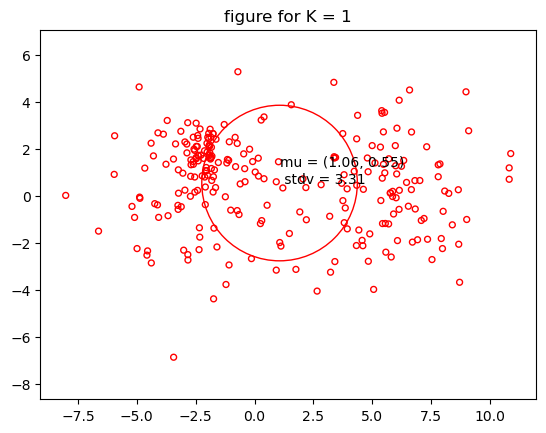

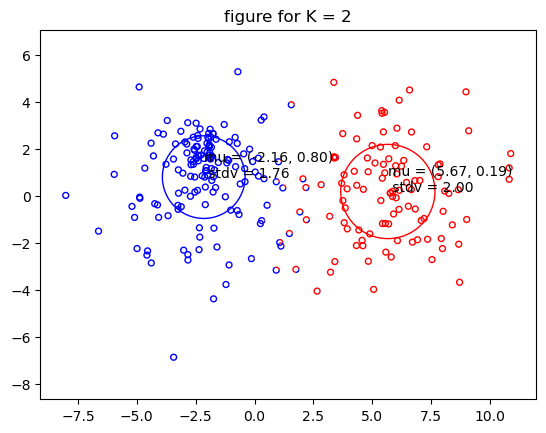

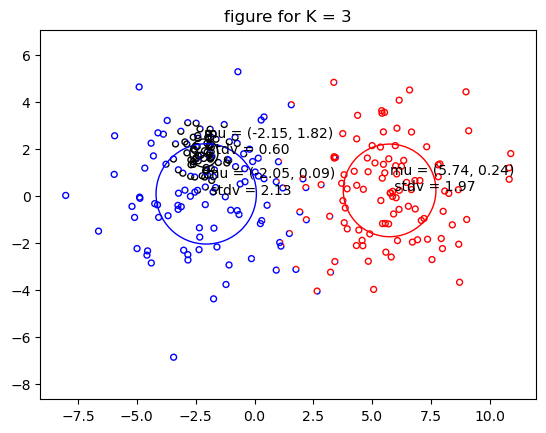

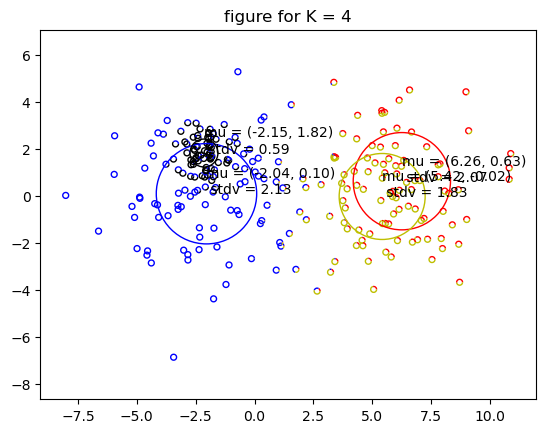

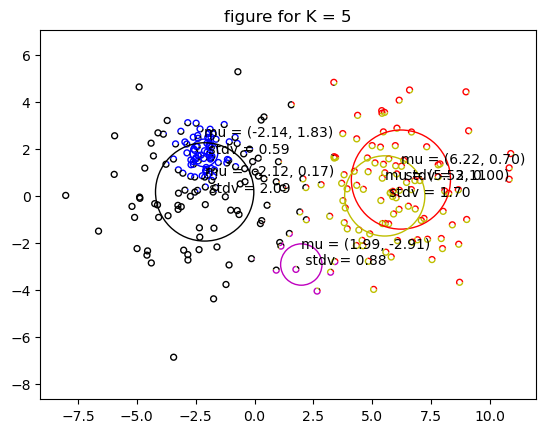

In [4]:
import numpy as np
import kmeans
import common
import em

X = np.loadtxt("toy_data.txt")

# TODO: Your code here
for K in range(1,6):
    mixture , post = common.init(X,K,seed=0)
    mixture , post , ll = em.run(X,mixture,post)
    common.plot(X,mixture,post,title=f"figure for K = {K}")
        

In [50]:
import numpy as np
x = np.array([[1,1],[2,2]])
sum(x[1])

4

In [51]:
x = np.array([[2,2],[2,0]])
x

array([[2, 2],
       [2, 0]])

In [3]:
import numpy as np
x = np.array([1,0,3])
y = np.array([2,3,4])
z = np.array([[1,2,3],[1,1,1],[1,1,3]])
sum(x==0)

1

In [6]:
def sub_convert(var:np.ndarray , k:int , check:np.ndarray):
    m = var.shape[0] # (m,m)
    res = np.zeros((m-k , m-k))
    row = -1
    for i in range(m):
        if not check[i] :
            continue
        row += 1
        col = -1
        for j in range(m):
            if not check[j]:
                continue
            col += 1
            res[row,col] = var[i,j]
    return res
        

def convert(x:np.ndarray , mu: np.ndarray , var: np.ndarray):
    """return x_Cu , mu_Cu , var_Cu"""
    k = sum(x==0)
    check = x!=0
    x_Cu = x[x!= 0]
    mu_Cu = mu[x!= 0]
    var_Cu = sub_convert(var , k , check)
    return x_Cu , mu_Cu , var_Cu


print(convert(x,y,z))

(array([1, 3]), array([2, 4]), array([[1., 3.],
       [1., 3.]]))


In [1]:
import numpy as np
import em
import common
K = 12
X = np.loadtxt("netflix_incomplete.txt")


mixture , post = common.init(X,K,seed=0)
mix , post , ll = em.run(X,mixture,post)

X_gold = np.loadtxt("netflix_complete.txt")
X_pred = em.fill_matrix(X , mix)
print(common.rmse(X_gold , X_pred))
print("X_pred:")
print(X_pred)
print("X_gold")
print(X_gold)


0.5025946174362197
X_pred:
[[2.         4.         5.         ... 4.         4.         4.        ]
 [3.         5.         5.         ... 5.         3.         4.        ]
 [2.         3.51029974 4.         ... 4.         4.         3.        ]
 ...
 [2.         3.         5.         ... 3.         4.         2.        ]
 [3.         4.         4.67097933 ... 4.         5.         4.        ]
 [3.         3.33700218 5.         ... 5.         4.         3.48355615]]
X_gold
[[2. 4. 5. ... 4. 4. 4.]
 [3. 5. 5. ... 5. 3. 4.]
 [2. 4. 4. ... 4. 4. 3.]
 ...
 [2. 3. 5. ... 3. 4. 2.]
 [3. 4. 5. ... 4. 5. 4.]
 [3. 4. 5. ... 5. 4. 4.]]
